In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2023-06-20 19:29:10.721697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 19:29:11.557616: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
file_name = "bbc-text.csv"
with open(file_name, 'r') as csvfile:
    print(csvfile.readline())
    print(csvfile.readline())

category,text

tech,tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also bei

In [3]:
NUM_WORDS = 1000
EMBEDDING_DIM = 16
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

In [4]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how",
             "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself",
             "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should",
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then",
             "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were",
             "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why",
             "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself",
             "yourselves"]

In [5]:
sentences, labels = [], []
with open(file_name, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1].lower()
        words = sentence.split()
        no_words = [w for w in words if w not in stopwords]
        sentence = " ".join(no_words)
        sentences.append(sentence)

In [6]:
classes = list(set(labels))
classes

['politics', 'business', 'tech', 'sport', 'entertainment']

In [7]:
X_train, X_val, y_train, y_val = train_test_split(sentences, labels, train_size=.8)

In [8]:

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token=OOV_TOKEN)

tokenizer.fit_on_texts(X_train)

word_indices = tokenizer.word_index

In [9]:
print(f"Vocabulary contains {len(word_indices)} words\n")

Vocabulary contains 27183 words



In [10]:
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded_sequences = pad_sequences(train_sequences, padding=PADDING, maxlen=MAXLEN)

val_sequences = tokenizer.texts_to_sequences(X_val)
val_padded_sequences = pad_sequences(val_sequences, padding=PADDING, maxlen=MAXLEN)

In [11]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
train_label_seq = np.array(label_tokenizer.texts_to_sequences(y_train)) - 1
val_label_seq = np.array(label_tokenizer.texts_to_sequences(y_val)) - 1

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAXLEN),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-06-20 19:29:26.487194: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-20 19:29:26.636554: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [13]:
history = model.fit(train_padded_sequences, train_label_seq, epochs=30,
                    validation_data=(val_padded_sequences, val_label_seq))

Epoch 1/30
56/56 [==============================] - 1s 4ms/step - loss: 1.5961 - accuracy: 0.3826 - val_loss: 1.5852 - val_accuracy: 0.4067
Epoch 2/30
56/56 [==============================] - 0s 2ms/step - loss: 1.5434 - accuracy: 0.4483 - val_loss: 1.5138 - val_accuracy: 0.4247
Epoch 3/30
56/56 [==============================] - 0s 2ms/step - loss: 1.4179 - accuracy: 0.5152 - val_loss: 1.3654 - val_accuracy: 0.5888
Epoch 4/30
56/56 [==============================] - 0s 2ms/step - loss: 1.2075 - accuracy: 0.6393 - val_loss: 1.1449 - val_accuracy: 0.6697
Epoch 5/30
56/56 [==============================] - 0s 2ms/step - loss: 0.9646 - accuracy: 0.7590 - val_loss: 0.9123 - val_accuracy: 0.8045
Epoch 6/30
56/56 [==============================] - 0s 2ms/step - loss: 0.7406 - accuracy: 0.8736 - val_loss: 0.7113 - val_accuracy: 0.8854
Epoch 7/30
56/56 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.9236 - val_loss: 0.5595 - val_accuracy: 0.9056
Epoch 8/30
56/56 [==

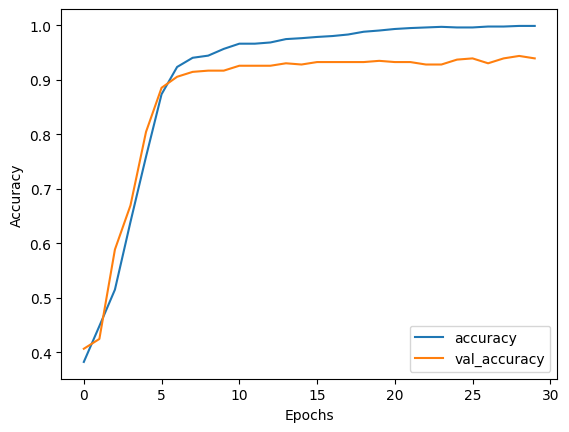

In [14]:
plt.plot(history.history["accuracy"])
plt.plot(history.history[f'val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", f'val_accuracy'])
plt.show()

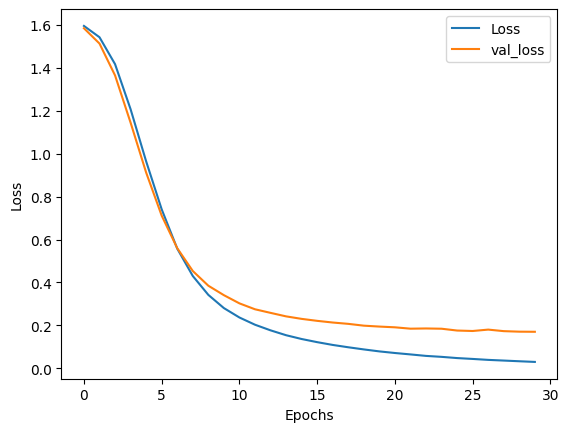

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history[f'val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", f'val_loss'])
plt.show()

In [16]:
reverse_word_index = dict([(value, key) for (key, value) in word_indices.items()])

In [17]:
reverse_word_index[628]

In [ ]:
classes

In [ ]:
len(reverse_word_index)

In [ ]:
import io

weights = model.layers[0].get_weights()[0]
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
# Index 1 OOV
for word_num in range(1, NUM_WORDS):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()